**DIAMONDS project by Sokolov Alexander**

In [60]:
import numpy as np
import pandas as pd
import math 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

In [61]:
df = pd.read_csv(r'diamonds.csv')

In [62]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [63]:
del df['Unnamed: 0']

In [64]:
df = df.rename(columns={'cut': 'качество', 'clarity': 'чистота','depth': 'глубина','table': 'таблица','price': 'цена'}) 
#поменяем названия на понятные

In [65]:
df.isnull().sum() #пропущенныхз значений нет, супер

carat       0
качество    0
color       0
чистота     0
глубина     0
таблица     0
цена        0
x           0
y           0
z           0
dtype: int64

<AxesSubplot:>

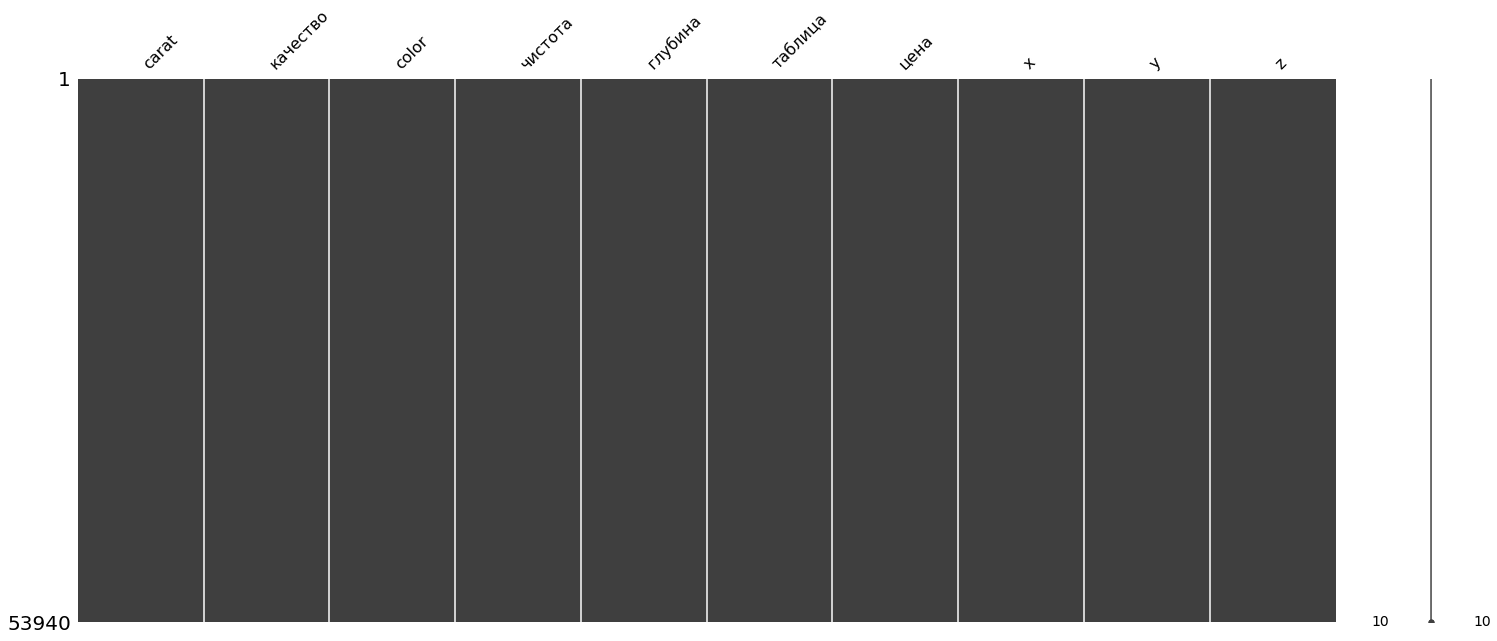

In [66]:
msno.matrix(df) #визуализировали все ок)

# Поймем какой датасет у нас есть

In [67]:
print('Size of data', df.shape)
num_rows, num_feature =df.shape
print('full data loaded')
print('number of rows: ', num_rows)
print('number of columns: ', num_feature)
print(list(df))

Size of data (53940, 10)
full data loaded
number of rows:  53940
number of columns:  10
['carat', 'качество', 'color', 'чистота', 'глубина', 'таблица', 'цена', 'x', 'y', 'z']


In [68]:
# Отфильтуем значения carat от меньшего к большему
df.sort_values("carat")

,carat,качество,color,чистота,глубина,таблица,цена,x,y,z
31593,0.20,Premium,E,VS2,61.1,59.0,367,3.81,3.78,2.32
31597,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
31596,0.20,Premium,F,VS2,62.6,59.0,367,3.73,3.71,2.33
31595,0.20,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30
31594,0.20,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28
...,...,...,...,...,...,...,...,...,...,...
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


In [69]:
df['carat'].count() # всего алмазов

53940

In [70]:
df.carat.mean() #получается среднее значение карата 0,79 при минимальном значении 0,2 и максимальном значении 5,01

0.7979397478679852

In [71]:
carat2= df[df['carat'] > 2] #при наших данных кол-во алмазов с каратом выше 2х - 1889
carat2

,carat,качество,color,чистота,глубина,таблица,цена,x,y,z
12246,2.06,Premium,J,I1,61.2,58.0,5203,8.10,8.07,4.95
13002,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36
13118,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23
13757,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36
13991,2.01,Fair,I,I1,67.4,58.0,5696,7.71,7.64,5.17
...,...,...,...,...,...,...,...,...,...,...
27741,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21
27742,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11


In [72]:
carat3 = df[df['carat'] > 3] # кол-во алмазов с каратом выше 3х - 32
carat3

,carat,качество,color,чистота,глубина,таблица,цена,x,y,z
19339,3.01,Premium,I,I1,62.7,58.0,8040,9.10,8.97,5.67
21758,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
21862,3.01,Premium,F,I1,62.2,56.0,9925,9.24,9.13,5.73
22428,3.05,Premium,E,I1,60.9,58.0,10453,9.26,9.25,5.66
22540,3.02,Fair,I,I1,65.2,56.0,10577,9.11,9.02,5.91
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
24131,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85
24297,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03


In [73]:
carat4 = df[df['carat'] > 4] # кол-во алмазов с каратом выше 4х - 5
carat4

,carat,качество,color,чистота,глубина,таблица,цена,x,y,z
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


In [74]:
carat5 = df[df['carat'] > 5]  #кол-во алмазов с каратом выше 5 всего 1
carat5

,carat,качество,color,чистота,глубина,таблица,цена,x,y,z
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


In [75]:
df['carat'].value_counts(normalize=True)

0.30    0.048276
0.31    0.041694
1.01    0.041565
0.70    0.036726
0.32    0.034112
          ...   
2.70    0.000019
3.67    0.000019
5.01    0.000019
2.77    0.000019
3.40    0.000019
Name: carat, Length: 273, dtype: float64

# Перейдем к визуализации


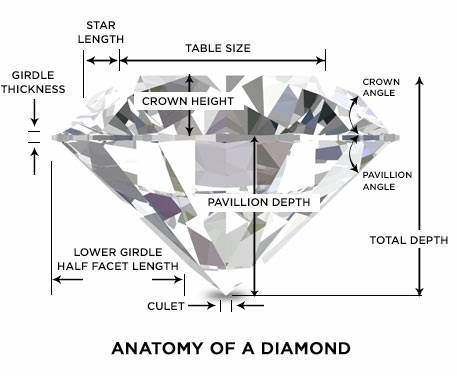

In [76]:
from IPython.display import Image
Image("Bbf0GWk.jpg") #это то как устроен алмаз

D:\anaconda\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


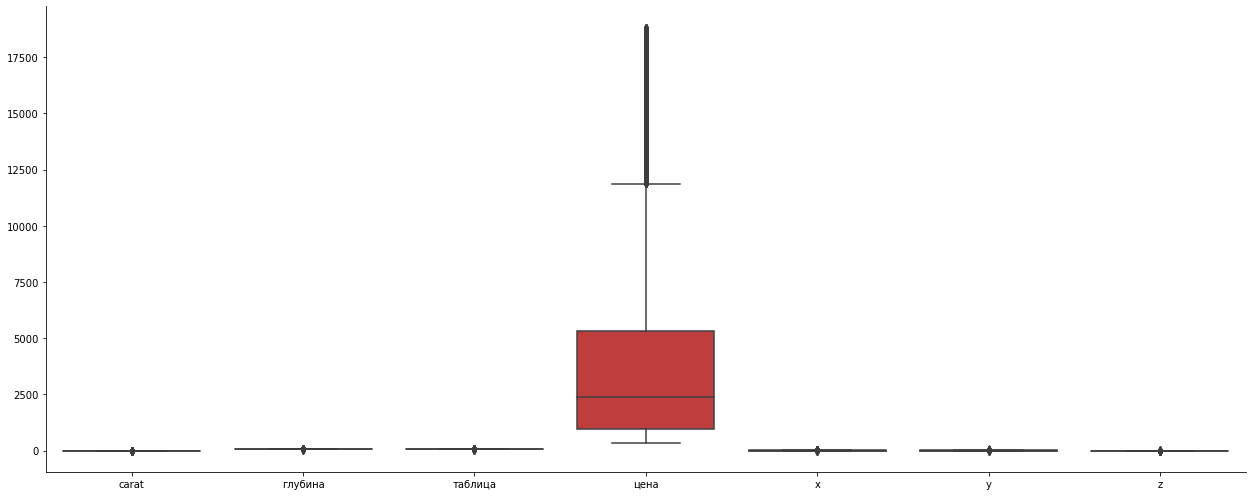

In [82]:
 sns.factorplot(data=df , kind='box' , size=7, aspect=2.5) #промасштабируем наши фичи

<AxesSubplot:>

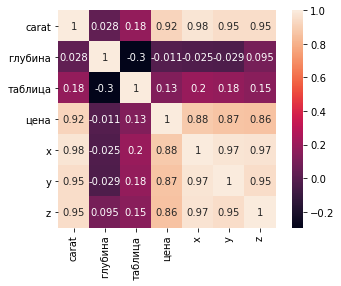

In [83]:
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True) #Наша корреляция между фичами

# Какой можно сделать вывод на основе визуализации?                                  
1. Глубина обратно пропорциональна цене.
Это связано с тем, что если процент глубины алмаза слишком мал или велик, то алмаз станет «темным» по внешнему виду, потому что он больше не будет возвращать достаточное количество света.
2. Цена бриллианта сильно коррелирует с каратом и его размерами.
3. Вес (карат) алмаза имеет самое большое влияние на его цену.
Поскольку чем крупнее камень, тем он более редкий, поэтому один бриллиант в 2 карата будет «дороже», чем общая стоимость двух бриллиантов в 1 карат того же качества.
4.Длина (x), ширина (y) и высота (z) сильно связаны с ценой и даже друг с другом.
5. Отношение к функции самой себе равно 1.

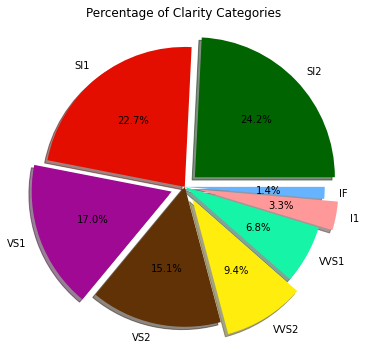

In [86]:
labels = df.чистота.unique().tolist()
sizes = df.чистота.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Здесь мы можем увидеть процент чистоты каждого алмаза. Для информации лмазная прозрачность означает отсутствие внутренний влечений и пятен. Снизу видно отличие обычного алмаза от чистейшего

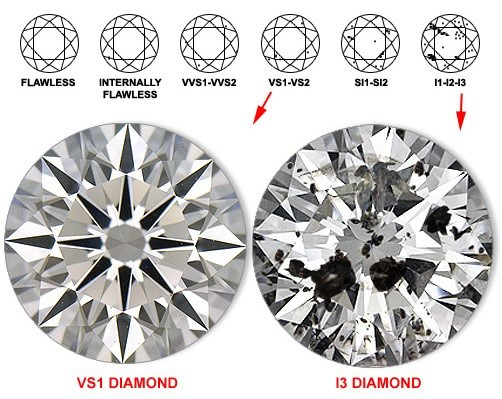

In [89]:
from IPython.display import Image
Image("fLbAstc.jpg")

# Ну и в конце надо объединить 2 датасета, возьмем наш и похожий по алмазам

In [91]:
mcdonalds = pd.read_csv('menu.csv')

In [92]:
mcdonalds

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [95]:
df.join(mcdonalds)

,carat,качество,color,чистота,глубина,таблица,цена,x,y,z,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,31.0,10.0,4.0,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,30.0,10.0,4.0,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,29.0,10.0,4.0,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,30.0,10.0,4.0,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,30.0,10.0,4.0,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Работу выполнил Соколов Александр**